In [152]:
import torch 
import torch.nn as  nn 
import torch.optim as optim 

import numpy as np
import matplotlib.pyplot as plt

In [153]:
x = torch.unsqueeze(torch.linspace(-1, 1, 50), dim=1)
y = x + 0.9 * torch.rand(x.size())
print(x.shape, y.shape)

torch.Size([50, 1]) torch.Size([50, 1])


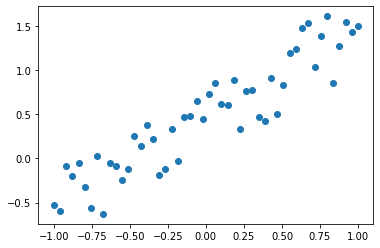

In [154]:
plt.scatter(x, y)

In [155]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1, 1)
        self.ac = nn.Tanh()
    def forward(self, x):
        return self.ac(self.layer1(x))

## Sending Data to GPU

In [156]:
x, y = x.to("cuda"), y.to("cuda")

## Initializing Model and sending to GPU 

In [157]:
model = Model().to("cuda")

In [158]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)

losses = []

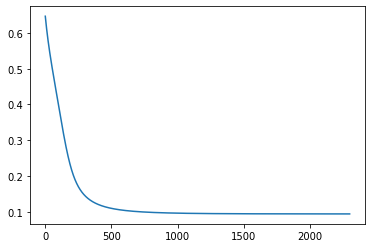

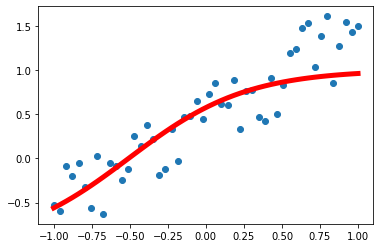

In [163]:
for epoch in range(1000):
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    print(f"Epoch: {epoch}, loss: {loss.item()}", end="\r")
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# Plot Loss plot
plt.plot(losses)
plt.show()

# See Results
plt.scatter(x.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(x.data.cpu().numpy(), y_hat.data.cpu().numpy(), 'r-', lw=5)
plt.show()